In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

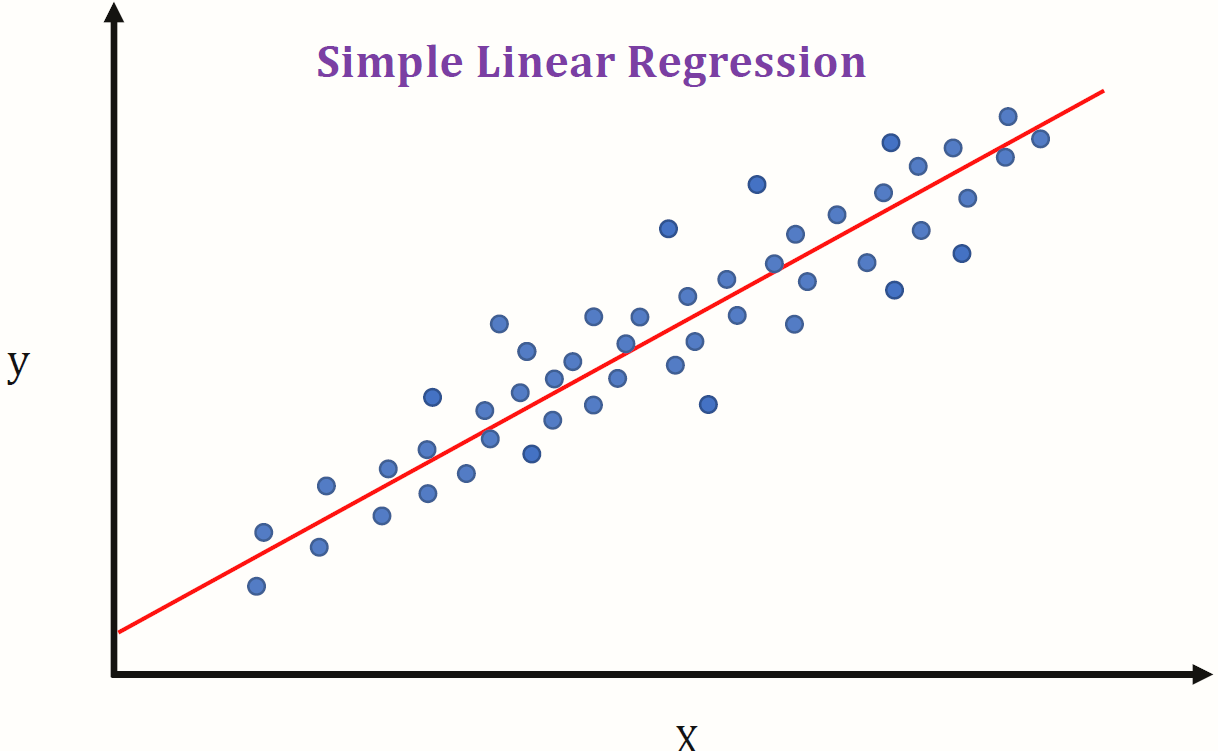

In [2]:
class model_simple (object):
    def __init__ (self):
        initializers = tf.keras.initializers.RandomUniform(minval=0., maxval=6.)
        self.w = tf.Variable(initializers(shape=()))
        self.b = tf.Variable(initializers(shape=()))
    
    def __call__ (self , x):
        return x * self.w + self.b

In [3]:
model = model_simple()

In [4]:
def loss_func_mean (y_true,y_pred):
    return tf.reduce_mean(tf.square(y_true,y_pred))

model input

In [5]:
true_w = 3.0
true_b = 2.0
num_example = 1000

x = tf.random.normal(shape=[num_example])
noise = tf.random.normal(shape=[num_example])

y = (true_w *x) + true_b + noise

In [6]:
y_pred = model(x)

In [7]:
def plot_data (x ,y_true , w , b ,y_pred):
    y = (x * w) + b
    plt.plot(x,y_true,'r.')
    plt.plot(x,y , 'g',label = 'actual line')
    plt.plot(x,y_pred , 'b' ,label= 'pred line')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis([0,2,0,8])
    plt.show()

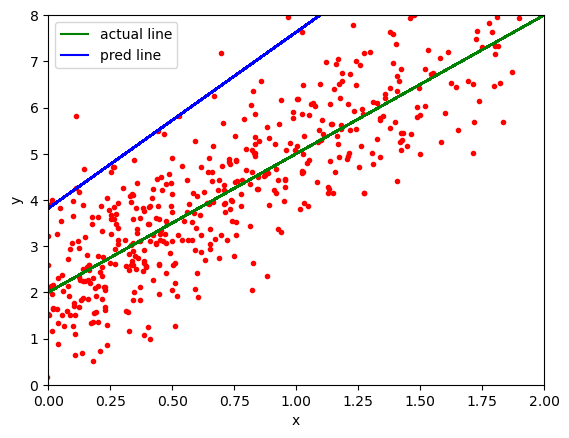

In [8]:
plot_data(x,y,true_w,true_b,y_pred)

## define tarining loop

In [9]:
def train_loop (model , inputs, outputs,learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss_func_mean(model(inputs),outputs)
    dloss_dw , dloss_db = t.gradient(current_loss , [model.w,model.b])
    model.w.assign_sub(learning_rate * dloss_dw)
    model.b.assign_sub(learning_rate * dloss_db)
    return current_loss

In [10]:
model = model_simple()

list_w , list_b, loss = [],[],[]


# Training loop
epochs = range(20)
for epoch in epochs:
    list_w.append(model.w.numpy())  # Store current weight
    list_b.append(model.b.numpy())  # Store current bias
    current_loss = train_loop(model, x, y, learning_rate=0.1)  # Get the loss
    loss.append(current_loss.numpy())  # Store the loss value
    print(f"Epoch {epoch:1}: w={list_w[-1]:2.2f}, b={list_b[-1]:1.2f}, loss={loss[-1]:2.5f}")

# Final values
print(f"\nFinal values: w={model.w.numpy():1.2f}, b={model.b.numpy():1.2f}")
print(f"True values: w={true_w:1.2f}, b={true_b:1.2f}")

Epoch 0: w=5.74, b=5.74, loss=65.15993
Epoch 1: w=4.61, b=4.59, loss=41.90858
Epoch 2: w=3.70, b=3.68, loss=26.95441
Epoch 3: w=2.97, b=2.94, loss=17.33650
Epoch 4: w=2.39, b=2.36, loss=11.15058
Epoch 5: w=1.92, b=1.89, loss=7.17196
Epoch 6: w=1.54, b=1.51, loss=4.61300
Epoch 7: w=1.24, b=1.21, loss=2.96710
Epoch 8: w=0.99, b=0.97, loss=1.90848
Epoch 9: w=0.80, b=0.78, loss=1.22757
Epoch 10: w=0.64, b=0.62, loss=0.78960
Epoch 11: w=0.52, b=0.50, loss=0.50790
Epoch 12: w=0.41, b=0.40, loss=0.32670
Epoch 13: w=0.33, b=0.32, loss=0.21015
Epoch 14: w=0.27, b=0.26, loss=0.13518
Epoch 15: w=0.21, b=0.20, loss=0.08695
Epoch 16: w=0.17, b=0.16, loss=0.05593
Epoch 17: w=0.14, b=0.13, loss=0.03598
Epoch 18: w=0.11, b=0.10, loss=0.02315
Epoch 19: w=0.09, b=0.08, loss=0.01489

Final values: w=0.07, b=0.07
True values: w=3.00, b=2.00


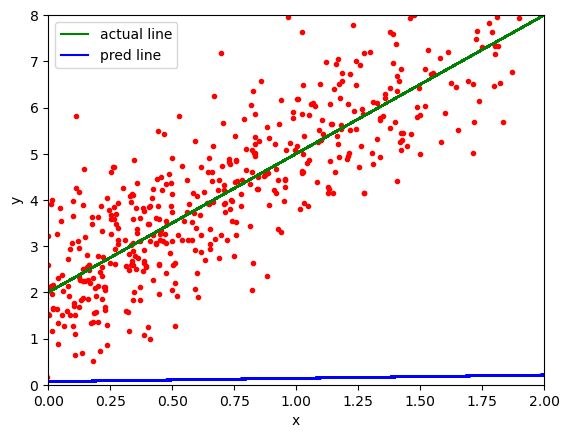

In [11]:
y_pred = model(x)
plot_data(x, y, true_w, true_b, y_pred)

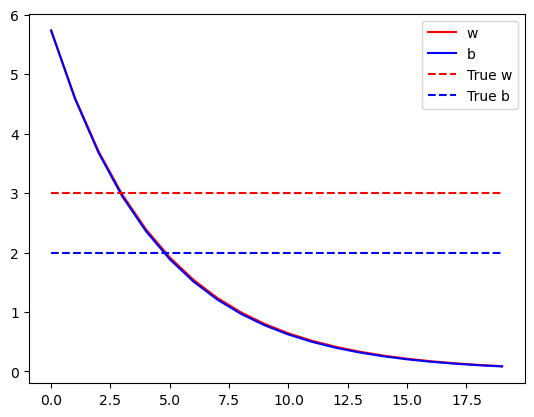

In [12]:
plt.plot(epochs, list_w, 'r',
       epochs, list_b, 'b')
plt.plot([true_w] * len(epochs), 'r--',
      [true_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

In [13]:
true_w = 3.0
true_b = 2.0
num_example = 1000

x = tf.random.normal([num_example])
noise = tf.random.normal([num_example])

y_true = (x*true_w) + (true_b +noise)


In [14]:
class model_simple (object):
    def __init__(self):
        intionalize= tf.keras.initializers.RandomUniform(minval=0, maxval=6)
        self.w = tf.Variable(intionalize(shape=()))
        self.b = tf.Variable(intionalize(shape=()))
    
    def __call__(self,x):
        return x * (self.w) +self.b

In [15]:
def loss_func (y_true_,y_pred):
    return tf.reduce_mean(tf.square(y_true_ - y_pred))

In [36]:
def plot_simple (x,y_true,y_pred):
    plt.plot(x,y_true,'r.')
    plt.plot(x,y_true,'g',label = 'actual linear')
    plt.plot(x,y_pred,'b',label = 'pred linear')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis([0.,2.,0.,6.])
    plt.show()

In [37]:
model = model_simple()

In [38]:
def train (model,inputs,outputs,learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss_func(outputs,model(inputs))
    dloss_dw , dloss_db = t.gradient(current_loss,[model.w,model.b])
    model.w.assign_sub(learning_rate *dloss_dw)
    model.b.assign_sub(learning_rate *dloss_db)
    return current_loss

In [39]:
list_b , list_w, loss= [],[],[]
epochs = range(20)
model = model_simple()

for epoch in epochs:
    list_b.append(model.w.numpy())
    list_w.append(model.b.numpy())
    current_loss = train(model,x,y_true,learning_rate=0.1)
    loss.append(current_loss)
    print(f"Epoch {epoch:1}: w={list_w[-1]:2.2f}, b={list_b[-1]:1.2f}, loss={loss[-1]:2.5f}")

# Final values
print(f"\nFinal values: w={model.w.numpy():1.2f}, b={model.b.numpy():1.2f}")
print(f"True values: w={true_w:1.2f}, b={true_b:1.2f}")

Epoch 0: w=3.07, b=3.07, loss=2.14540
Epoch 1: w=2.85, b=3.06, loss=1.73588
Epoch 2: w=2.68, b=3.05, loss=1.47356
Epoch 3: w=2.55, b=3.05, loss=1.30549
Epoch 4: w=2.44, b=3.04, loss=1.19778
Epoch 5: w=2.35, b=3.04, loss=1.12873
Epoch 6: w=2.28, b=3.03, loss=1.08445
Epoch 7: w=2.22, b=3.03, loss=1.05605
Epoch 8: w=2.18, b=3.03, loss=1.03783
Epoch 9: w=2.14, b=3.02, loss=1.02614
Epoch 10: w=2.11, b=3.02, loss=1.01863
Epoch 11: w=2.09, b=3.02, loss=1.01381
Epoch 12: w=2.07, b=3.02, loss=1.01072
Epoch 13: w=2.06, b=3.01, loss=1.00873
Epoch 14: w=2.05, b=3.01, loss=1.00745
Epoch 15: w=2.04, b=3.01, loss=1.00662
Epoch 16: w=2.03, b=3.01, loss=1.00609
Epoch 17: w=2.02, b=3.01, loss=1.00575
Epoch 18: w=2.02, b=3.01, loss=1.00553
Epoch 19: w=2.01, b=3.01, loss=1.00539

Final values: w=3.01, b=2.01
True values: w=3.00, b=2.00
